# Generating meshes
In order to visualize two-dimensional arrays of data, it is necessary to understand how to generate and manipulate 2-D arrays. Many Matplotlib plots support arrays as input and in particular, they support NumPy arrays. The NumPy library is the most widely-supported means for supporting numeric arrays in Python.

In this exercise, you will use the meshgrid function in NumPy to generate 2-D arrays which you will then visualize using plt.imshow(). The simplest way to generate a meshgrid is as follows:

```
import numpy as np
Y,X = np.meshgrid(range(10),range(20))
```

This will create two arrays with a shape of (20,10), which corresponds to 20 rows along the Y-axis and 10 columns along the X-axis. In this exercise, you will use np.meshgrid() to generate a regular 2-D sampling of a mathematical function.

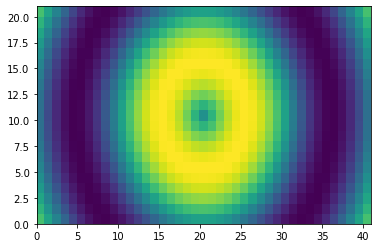

<Figure size 432x288 with 0 Axes>

In [1]:
# Import numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u, v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show()

# Save the figure to 'sine_mesh.png'
plt.savefig('sine_mesh.png')

# Contour & filled contour plots
Although plt.imshow() or plt.pcolor() are often used to visualize a 2-D array in entirety, there are other ways of visualizing such data without displaying all of the available sample values. One option is to use the array to compute contours that are visualized instead.

Two types of contour plot supported by Matplotlib are plt.contour() and plt.contourf() where the former displays the contours as lines and the latter displayed filled areas between contours. Both these plotting commands accept a two dimensional array from which the appropriate contours are computed.

In this exercise, you will visualize a 2-D array repeatedly using both plt.contour() and plt.contourf(). You will use plt.subplot() to display several contour plots in a common figure, using the meshgrid X, Y as the axes. For example, plt.contour(X, Y, Z) generates a default contour map of the array Z.

Don't forget to include the meshgrid in each plot for this exercise!

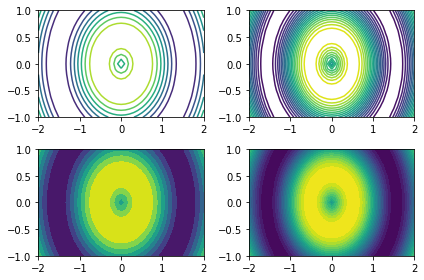

In [3]:
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X, Y, Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X, Y, Z, 20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X, Y, Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20)

# Improve the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()



# Modifying colormaps
When displaying a 2-D array with plt.imshow() or plt.pcolor(), the values of the array are mapped to a corresponding color. The set of colors used is determined by a colormap which smoothly maps values to colors, making it easy to understand the structure of the data at a glance.

It is often useful to change the colormap from the default 'jet' colormap used by matplotlib. A good colormap is visually pleasing and conveys the structure of the data faithfully and in a way that makes sense for the application.

- Some matplotlib colormaps have unique names such as 'jet', 'coolwarm', 'magma' and 'viridis'.
- Others have a naming scheme based on overall color such as 'Greens', 'Blues', 'Reds', and 'Purples'.
- Another four colormaps are based on the seasons, namely 'summer', 'autumn', 'winter' and 'spring'.
- You can insert the option cmap=<name> into most matplotlib functions to change the color map of the resulting plot.

In this exercise, you will explore four different colormaps together using plt.subplot(). You will use a pregenerated array Z and a meshgrid X, Y to generate the same filled contour plot with four different color maps. Be sure to also add a color bar to each filled contour plot with plt.colorbar().

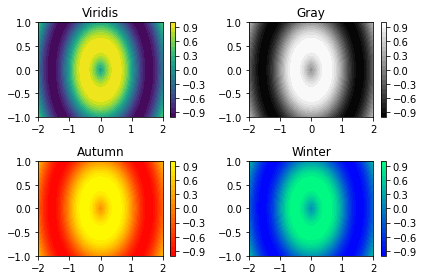

In [4]:
# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X,Y,Z,20, cmap='autumn')
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20, cmap='winter')
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


# Using hist2d()
Given a set of ordered pairs describing data points, you can count the number of points with similar values to construct a two-dimensional histogram. This is similar to a one-dimensional histogram, but it describes the joint variation of two random variables rather than just one.

In matplotlib, one function to visualize 2-D histograms is plt.hist2d().

- You specify the coordinates of the points using plt.hist2d(x,y) assuming x and y are two vectors of the same length.
- You can specify the number of bins with the argument bins=(nx, ny) where nx is the number of bins to use in the horizontal direction and ny is the number of bins to use in the vertical direction.
- You can specify the rectangular region in which the samples are counted in constructing the 2D histogram. The optional parameter required is range=((xmin, xmax), (ymin, ymax)) where
- xmin and xmax are the respective lower and upper limits for the variables on the x-axis and
- ymin and ymax are the respective lower and upper limits for the variables on the y-axis. Notice that the optional range argument can use nested tuples or lists.

In this exercise, you'll use some data from the auto-mpg data set. There are two arrays mpg and hp that respectively contain miles per gallon and horse power ratings from over three hundred automobiles built.

In [6]:
import pandas as pd 
auto_mpg = pd.read_csv('../datasets/auto-mpg.csv')
print(auto_mpg.head())

    mpg  cyl  displ   hp  ...              name  color       size marker
0  18.0    6  250.0   88  ...      ford mustang    red  27.370336      o
1   9.0    8  304.0  193  ...          hi 1200d  green  62.199511      o
2  36.1    4   91.0   60  ...  honda civic cvcc   blue   9.000000      x
3  18.5    6  250.0   98  ...      ford granada    red  34.515625      o
4  34.3    4   97.0   78  ...         audi 4000   blue  13.298178      s

[5 rows x 12 columns]


In [7]:
hp = auto_mpg['hp']
print(hp.head())

0     88
1    193
2     60
3     98
4     78
Name: hp, dtype: int64


In [8]:
mpg = auto_mpg['mpg']
print(mpg.head())

0    18.0
1     9.0
2    36.1
3    18.5
4    34.3
Name: mpg, dtype: float64


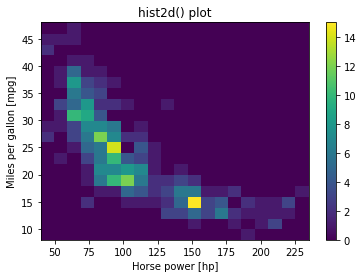

In [9]:
# Generate a 2-D histogram
plt.hist2d(hp, mpg, bins=(20,20), range=((40, 235), (8,48)))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()


# Using hexbin()
The function plt.hist2d() uses rectangular bins to construct a two dimensional histogram. As an alternative, the function plt.hexbin() uses hexagonal bins. The underlying algorithm (based on this article from 1987) constructs a hexagonal tesselation of a planar region and aggregates points inside hexagonal bins.

- The optional gridsize argument (default 100) gives the number of hexagons across the x-direction used in the hexagonal tiling. If specified as a list or a tuple of length two, gridsize fixes the number of hexagon in the x- and y-directions respectively in the tiling.
- The optional parameter extent=(xmin, xmax, ymin, ymax) specifies rectangular region covered by the hexagonal tiling. In that case, xmin and xmax are the respective lower and upper limits for the variables on the x-axis and ymin and ymax are the respective lower and upper limits for the variables on the y-axis.

In this exercise, you'll use the same auto-mpg data as in the last exercise (again using arrays mpg and hp). This time, you'll use plt.hexbin() to visualize the two-dimensional histogram.

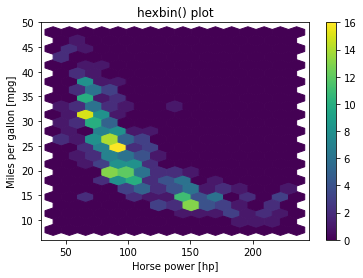

In [10]:
# Generate a 2d histogram with hexagonal bins
plt.hexbin(hp, mpg, gridsize=(15,12), extent=(40, 235, 8, 48))
      
# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()


# Loading, examining images
Color images such as photographs contain the intensity of the red, green and blue color channels.

- To read an image from file, use plt.imread() by passing the path to a file, such as a PNG or JPG file.
- The color image can be plotted as usual using plt.imshow().
- The resulting image loaded is a NumPy array of three dimensions. The array typically has dimensions $M \times N \times 3$, where  is the dimensions of the image. The third dimensions $M \times N$ are referred to as color channels (typically red, green, and blue).
= The color channels can be extracted by Numpy array slicing.
In this exercise, you will load & display an image of an astronaut (by NASA (Public domain), via Wikimedia Commons). You will also examine its attributes to understand how color images are represented.

(600, 600, 3)


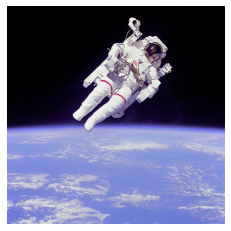

In [12]:
# Load the image into an array: img
img = plt.imread('../datasets/600px-Bruce_McCandless_II_during_EVA_in_1984.jpg')

# Print the shape of the image
print(img.shape)

# Display the image
plt.imshow(img)

# Hide the axes
plt.axis('off')
plt.show()


# Pseudocolor plot from image data
Image data comes in many forms and it is not always appropriate to display the available channels in RGB space. In many situations, an image may be processed and analysed in some way before it is visualized in pseudocolor, also known as 'false' color.

In this exercise, you will perform a simple analysis using the image showing an astronaut as viewed from space. Instead of simply displaying the image, you will compute the total intensity across the red, green and blue channels. The result is a single two dimensional array which you will display using plt.imshow() with the 'gray' colormap.

(600, 600, 3)
(600, 600)


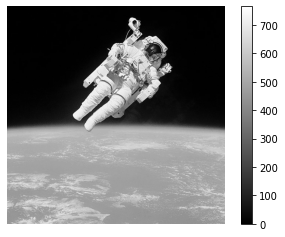

In [13]:
# Load the image into an array: img
img = plt.imread('../datasets/600px-Bruce_McCandless_II_during_EVA_in_1984.jpg')

# Print the shape of the image
print(img.shape)

# Compute the sum of the red, green and blue channels: intensity
intensity = img.sum(axis=2)

# Print the shape of the intensity
print(intensity.shape)

# Display the intensity with a colormap of 'gray'
plt.imshow(intensity, cmap='gray')

# Add a colorbar
plt.colorbar()

# Hide the axes and show the figure
plt.axis('off')
plt.show()


# Extent and aspect
When using plt.imshow() to display an array, the default behavior is to keep pixels square so that the height to width ratio of the output matches the ratio determined by the shape of the array. In addition, by default, the x- and y-axes are labeled by the number of samples in each direction.

The ratio of the displayed width to height is known as the image aspect and the range used to label the x- and y-axes is known as the image extent. The default aspect value of 'auto' keeps the pixels square and the extents are automatically computed from the shape of the array if not specified otherwise.

In this exercise, you will investigate how to set these options explicitly by plotting the same image in a 2 by 2 grid of subplots with distinct aspect and extent options.

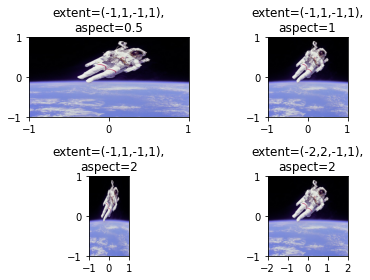

In [14]:
# Load the image into an array: img
img = plt.imread('../datasets/600px-Bruce_McCandless_II_during_EVA_in_1984.jpg')

# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

# Specify the extent and aspect ratio of the top right subplot
plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=1)

# Specify the extent and aspect ratio of the bottom left subplot
plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=2)

# Specify the extent and aspect ratio of the bottom right subplot
plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-2,2,-1,1), aspect=2)

# Improve spacing and display the figure
plt.tight_layout()
plt.show()

# Rescaling pixel intensities
Sometimes, low contrast images can be improved by rescaling their intensities. For instance, this image of Hawkes Bay, New Zealand has no pixel values near 0 or near 255 (the limits of valid intensities). (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0)

For this exercise, you will do a simple rescaling (remember, an image is NumPy array) to translate and stretch the pixel intensities so that the intensities of the new image fill the range from 0 to 255.

The smallest & largest pixel intensities are 104 & 230.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


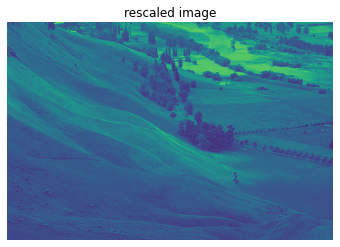

In [15]:
# Load the image into an array: image
image = plt.imread('../datasets/640px-Unequalized_Hawkes_Bay_NZ.jpg')

# Extract minimum and maximum values from the image: pmin, pmax
pmin, pmax = image.min(),image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

# Rescale the pixels: rescaled_image
rescaled_image = 256*(image - pmin)/(pmax - pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

# Display the rescaled image
plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_image)

plt.show()
